Numerical Sultions For Gravity Potential
By Joshua Martel

In [105]:
from sympy import *

# this command makes pretty looking formula printing
init_printing(pretty_print=True)


In [106]:
x, r, R, theta, G, M, g, lam = symbols('x r R theta G M g lambda')
n = symbols('n', integer=True)
f, genfun, Phi = symbols('f genfun Phi', cls=Function)

The potential equation of a ring will be
\
$\Phi = -G\int_{}^{}\frac{dM}{s} = -G\int_{0}^{2\pi}\frac{\lambda Rd\theta}{s}$
\
where $\lambda$ is the line density and s is the distance from a point on the ring

Using the law of cosines gives 
\
$s^2 = R^2 + r^2 - 2Rrcos\theta$
\
and plugging into last equation gives
\
$\Phi = -2R\lambda G\int_{0}^{2\pi}\frac{d\theta}{(R^2 + r^2 - 2Rrcos)^\frac{1}{2}}$
\
$ = \frac{-2R\lambda}{R} G\int_{0}^{2\pi}\frac{d\theta}{(1 + \frac{r^2}{R^2} - 2\frac{r}{R}cos)^\frac{1}{2}}$
\
let x = $\frac{r}{R}$

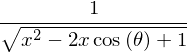

In [107]:
#Process is exactly like that of turorial, so I will use that code.
genfun = 1/sqrt(1+x**2-2*x*cos(theta))
genfun

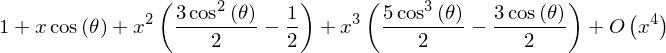

In [108]:
genfun.series(x,0,4)

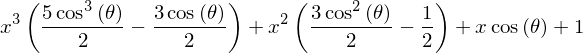

In [109]:
getfunc_trunc = (genfun.series(x,0,4)).removeO()
getfunc_trunc

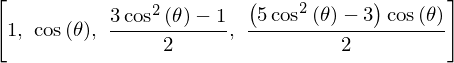

In [110]:
coeff = [getfunc_trunc.coeff(x,i).factor() for i in range(4)]
coeff

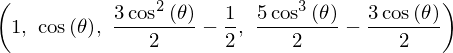

In [111]:
legendre(0,cos(theta)), legendre(1,cos(theta)),\
legendre(2,cos(theta)), legendre(3,cos(theta))

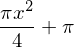

In [112]:
integral = integrate(getfunc_trunc, (theta,0,pi))
integral

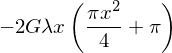

In [113]:
phi = -2*lam*x*G*integral
phi

The gravitational potential of the ring for r < R is


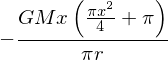

In [114]:
#This is where the code differs from the turorial
f = phi.subs({lam:M/(2*pi*r)})
print ("The gravitational potential of the ring for r < R is")
f

Part b

In [115]:
RJ = 7.784e11  # radius of Jupiter's orbit in m
MJ = 1.90e27   # Jupiter's mass in kg
GN = 6.674e-11 # Newton's gravitational constant in SI units
RE = 1.496e11  # radius of Earth's orbit in m

fJE = (f.subs({G:GN, M:MJ, r:RE, x:(RE/RJ)}))
print ("The gravitational potential of Jupiter's ring",\
       "at Earth's orbit is",fJE,"SI units")

The gravitational potential of Jupiter's ring at Earth's orbit is -164410.261159293 SI units


Part c

In [116]:
#Libraries for calculations
import numpy as np
import mpmath

In [117]:
#This is the potential function
f = lambda i:1/sqrt(1+(RS/RJ)**2-2*(RS/RJ)*cos(i*np.pi/(N/2)))

In [119]:
RJ = 7.784e11  # radius of Jupiter's orbit in m
MJ = 1.90e27   # Jupiter's mass in kg
GN = 6.674e-11 # Newton's gravitational constant in SI units
RE = 1.496e11  # radius of Earth's orbit in m

#Base cases.Allows following loop to run
#initial values and equations to use
N = 1
cof = -2*GN*MJ/RJ
a = i*np.pi/(N/2)

#This sums in terms of values of i in f
preout = mpmath.nsum(f, [0, N/2])*cof

#Set up for next N
N = 2
MJ = MJ/N
cof = -2*GN*MJ/RJ
a = i*np.pi/(N/2)

output = mpmath.nsum(f, [0, N/2])*cof

#The idea is to take the ratio of the previus value over the output, and the closue it is to 1 the
#more accurate our calculation is
aprox = abs(preout/output)

#Keep track of what is happening
print(aprox)

#itereates through values of N*2
while aprox > 0.0001+1:
    MJ = 1.90e27 
    print(aprox)
    N *= 2
    MJ = MJ/N
    cof = -2*GN*MJ/RJ
    output = mpmath.nsum(f, [0, N/2])*cof
    aprox = abs(preout/output)
    preout = output


1.19218910585817
1.19218910585817
1.61885699433571
1.20515604903958
1.11393261024906
1.06040712977108
1.03114423170828
1.01581844247296
1.00797227572898
1.00400209074996
1.00200505758619
1.00100353486569
1.0005020193298
1.00025107268657
1.00012555210464


In [121]:
print(N)
print(fJE)
print(output)
print(output - fJE)

32768
-164410.261159293
-164452.665209495
-42.4040502025455


So it takes 32768 individual masses to get desired accuracy, and this result differs by -42 units from answer from part b

Part d

In [155]:
RJ = 7.784e11  # radius of Jupiter's orbit in m
MJ = 1.90e27   # Jupiter's mass in kg
GN = 6.674e-11 # Newton's gravitational constant in SI units
RS = 1.496e11  # 
#list of potentials
potential = []

MJ = 1.90e27   
r1 = 0.0
N = 1
cof = -2*GN*MJ/RJ
a = i*np.pi/(N/2)
RS *= r1
#f needs to be reset for every RS
f = lambda i:1/sqrt(1+(RS/RJ)**2-2*(RS/RJ)*cos(i*np.pi/(N/2)))

preout = mpmath.nsum(f, [0, N/2])*cof

N = 2
MJ = MJ/N
cof = -2*GN*MJ/RJ
a = i*np.pi/(N/2)

output = mpmath.nsum(f, [0, N/2])*cof
pot0 = output
aprox = abs(preout/output)
#Same as for part c, except interates for ever r1
while r1 < 1:
    MJ = 1.90e27
    RS = 1.496e11
    RS *= r1
    N = 1
    
    cof = -2*GN*MJ/RJ
    a = i*np.pi/(N/2)
    
    f = lambda i:1/sqrt(1+(RS/RJ)**2-2*(RS/RJ)*cos(i*np.pi/(N/2)))
    preout = mpmath.nsum(f, [0, N/2])*cof

    N = 2
    MJ = MJ/N
    cof = -2*GN*MJ/RJ
    a = i*np.pi/(N/2)
    
    output = mpmath.nsum(f, [0, N/2])*cof
    aprox = abs(preout/output)
    #next loop does not run for r1 == 0.0
    if r1 == 0.0:
        pot0 = output
    while aprox > 0.0001+1:
        MJ = 1.90e27 
        N *= 2
        MJ = MJ/N
        cof = -2*GN*MJ/RJ
        output = mpmath.nsum(f, [0, N/2])*cof
        aprox = abs(preout/output)
        preout = output
    potential.append(abs(pot0 - output))
    r1 += 0.2

In [156]:
from matplotlib.pyplot import *
%matplotlib inline
 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

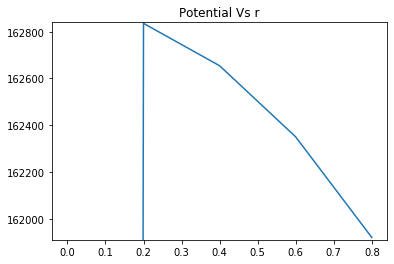

In [157]:
RS = 1.496e11
rlist = [0.0,0.2,0.4,0.6,0.8]

figure(1)
title("Potential Vs r")
ylim(bottom = 161910, top = 162840)
plot(rlist,potential)

In [158]:
#lets look at the values of potential, and examine their differences 
potential

[mpf('0.0'),
 mpf('162835.78117523005'),
 mpf('162654.46739188206'),
 mpf('162350.2474912286'),
 mpf('161920.00913961657')]

In [159]:
162835.78117523005-162654.46739188206

In [160]:
162654.46739188206-162350.2474912286

In [161]:
162350.2474912286-161920.00913961657

The gravitational potential of the ring for r < R is


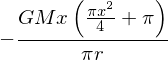

In [162]:
f1 = phi.subs({lam:M/(2*pi*r)})
print ("The gravitational potential of the ring for r < R is")
f1

In [163]:
#compare values of potential to that of above equation
RJ = 7.784e11  
MJ = 1.90e27   
GN = 6.674e-11 
RS = 1.496e11  
r1 = 0.0
potlist = []
while r1 < 1:   
    pot1 = (f1.subs({G:GN, M:MJ, r:RS*r1, x:(RS*r1/RJ)}))
    
    print ("The gravitational potential r =",r1,"\n",pot1)
    r1 +=0.2

The gravitational potential r = 0.0 
 nan
The gravitational potential r = 0.2 
 -162966.132954080
The gravitational potential r = 0.4 
 -163146.648979731
The gravitational potential r = 0.6000000000000001 
 -163447.509022484
The gravitational potential r = 0.8 
 -163868.713082338


In [144]:
162966.132954080 - 163146.648979731

In [152]:
163146.648979731-163447.509022484

In [153]:
163447.509022484-163868.713082338

Thus potential follows the same quadratic trend as our approximated equation